In [1]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt

from sklearn import preprocessing
%matplotlib inline


In [2]:
df=pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
#DATA VISUAlIZATION AND ANALYSIS

df['custcat'].value_counts()


3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

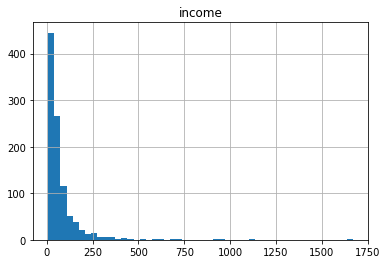

In [4]:
df.hist(column='income', bins=50)

In [5]:
#feature set

df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
x=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside',]]

x[0:5]


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [7]:
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [8]:
#NORMALIZING DATA

x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))

x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [9]:
#Test Train split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=4)

print('train set:',x_train.shape,y_train.shape)

print('test set:',x_test.shape,y_test.shape)



train set: (800, 11) (800,)
test set: (200, 11) (200,)


In [10]:
#classification

from sklearn.neighbors import KNeighborsClassifier

In [11]:
#TRAINING

k=4
#TRAIN MODEL AND PREDICT

neigh= KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [12]:
#predicting

yhat=neigh.predict(x_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [13]:
#ACCURACY EVALUATION

from sklearn.metrics  import accuracy_score

print(accuracy_score(y_train,neigh.predict(x_train)))

print(accuracy_score(y_test,yhat))

0.5475
0.32


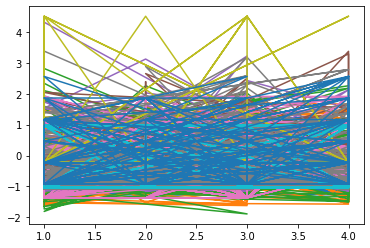

In [14]:
plt.plot(y_test,x_test)